<a href="https://colab.research.google.com/github/sabriades/Machine_Learning_Model/blob/main/RandomForestRegressor_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pickle
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from google.colab import files

uploaded = files.upload()

Saving NANOCOMPOSITES_DATASET_HERE_2ND.csv to NANOCOMPOSITES_DATASET_HERE_2ND.csv


In [5]:
nanocomposites=pd.read_csv('NANOCOMPOSITES_DATASET_HERE_2ND.csv')
nanocomposites.head(3)

,Polymer Matrix,Filler,Filler Concentration (wt%),Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%),Filler Geometry,Elastic Modulus matrix (MPa),Paper
0,Epoxy,GNP,0.2,3722.4,74.2,4.4,Graphene nanoplatelets (GNP),3554.7,26
1,Epoxy,GNP,0.4,3407.2,71.1,6.2,Graphene nanoplatelets (GNP),3554.7,26
2,Epoxy,MWCNT,0.2,3654.5,72.4,6.9,multi-walled carbon nanotubes (MWCNT),3554.7,26


In [6]:
nanocomposites=nanocomposites.drop(['Paper','Filler Geometry'], axis=1)

In [7]:
nanocomposites.head(3)

,Polymer Matrix,Filler,Filler Concentration (wt%),Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%),Elastic Modulus matrix (MPa)
0,Epoxy,GNP,0.2,3722.4,74.2,4.4,3554.7
1,Epoxy,GNP,0.4,3407.2,71.1,6.2,3554.7
2,Epoxy,MWCNT,0.2,3654.5,72.4,6.9,3554.7


In [8]:
nanocomposites.describe() #metodo

,Filler Concentration (wt%),Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%),Elastic Modulus matrix (MPa)
count,117.000000,117.000000,117.000000,117.000000,117.000000
mean,3.840598,2587.492821,48.423504,5.775812,2126.176667
std,4.757838,1224.501475,22.025364,6.078592,768.148047
min,0.100000,23.930000,13.000000,0.760000,19.590000
25%,1.000000,1780.000000,33.100000,2.900000,1668.000000
50%,2.000000,2561.300000,41.400000,4.000000,2159.800000
75%,5.000000,3300.000000,68.900000,6.500000,2467.200000
max,30.000000,7362.000000,94.790000,38.500000,3782.000000


In [9]:
nanocomposites_encoded=pd.get_dummies(nanocomposites)
nanocomposites_encoded.head(3)

,Filler Concentration (wt%),Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%),Elastic Modulus matrix (MPa),Polymer Matrix_ABS,Polymer Matrix_Epoxy,Polymer Matrix_PET,Polymer Matrix_PLA,Polymer Matrix_PMMA,...,Filler_GNP,Filler_GNS,Filler_GO,Filler_MWCNT,Filler_Nanosilica,Filler_SWCNT,Filler_Silica,Filler_TiO₂,Filler_h-BN,Filler_rGO
0,0.2,3722.4,74.2,4.4,3554.7,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,0.4,3407.2,71.1,6.2,3554.7,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,0.2,3654.5,72.4,6.9,3554.7,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [10]:
nanocomposites.shape #righe e colonne

(117, 7)

In [11]:
nanocomposites_encoded.shape

(117, 21)

In [12]:
nanocomposites_encoded.head(3)

,Filler Concentration (wt%),Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%),Elastic Modulus matrix (MPa),Polymer Matrix_ABS,Polymer Matrix_Epoxy,Polymer Matrix_PET,Polymer Matrix_PLA,Polymer Matrix_PMMA,...,Filler_GNP,Filler_GNS,Filler_GO,Filler_MWCNT,Filler_Nanosilica,Filler_SWCNT,Filler_Silica,Filler_TiO₂,Filler_h-BN,Filler_rGO
0,0.2,3722.4,74.2,4.4,3554.7,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,0.4,3407.2,71.1,6.2,3554.7,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,0.2,3654.5,72.4,6.9,3554.7,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False


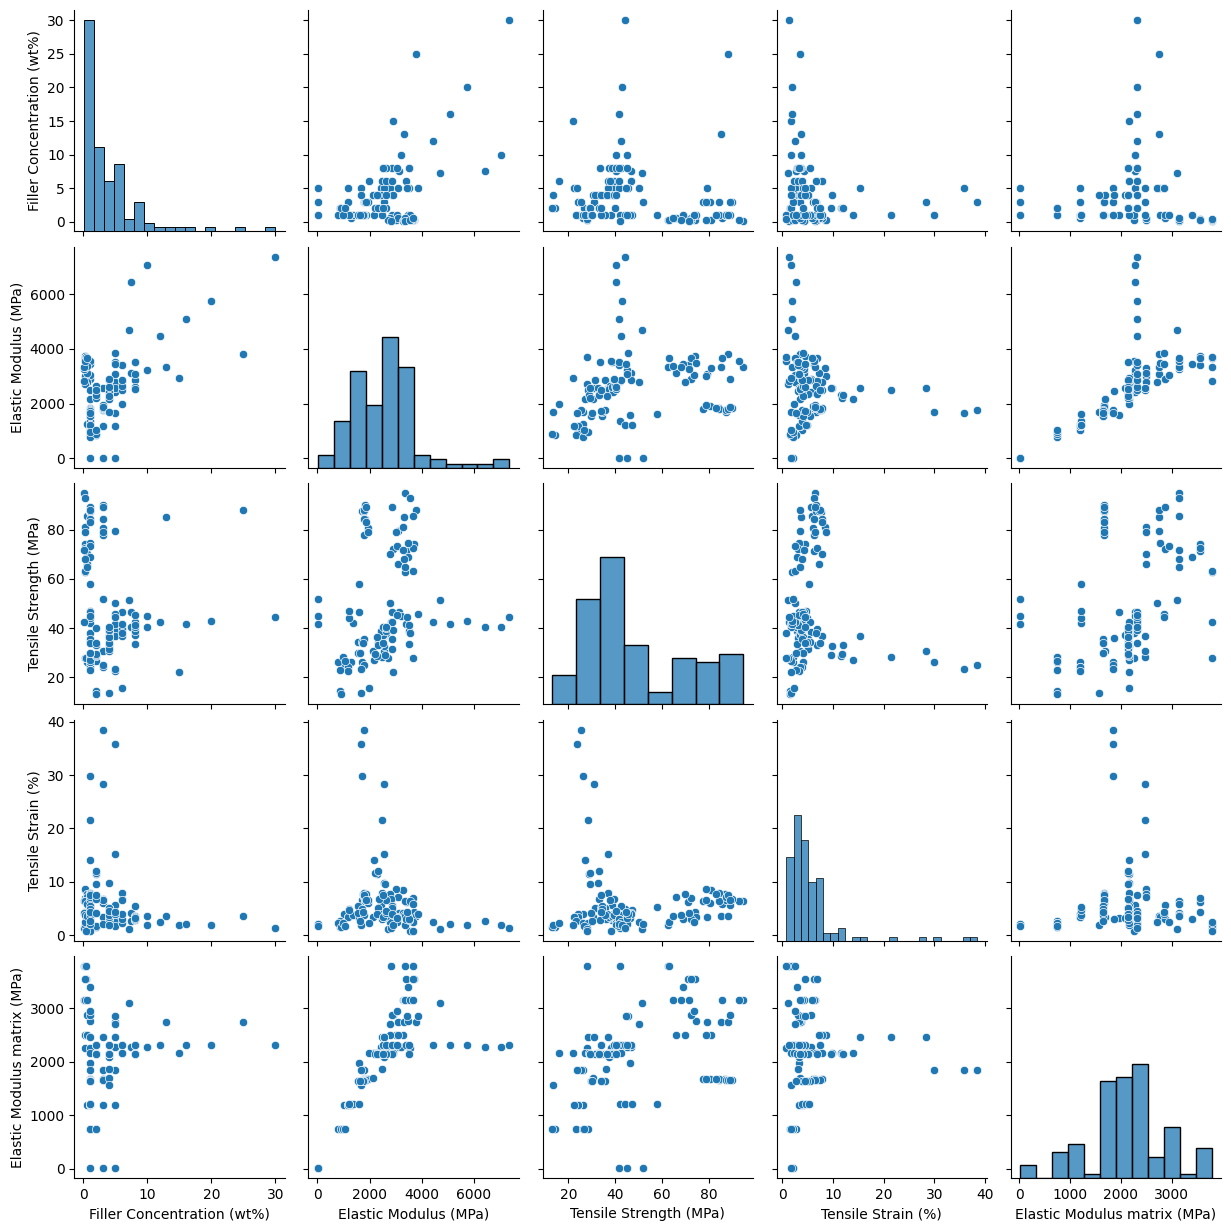

In [13]:
sns.pairplot(nanocomposites)

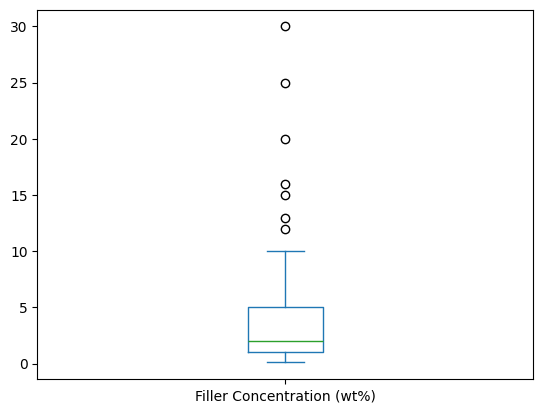

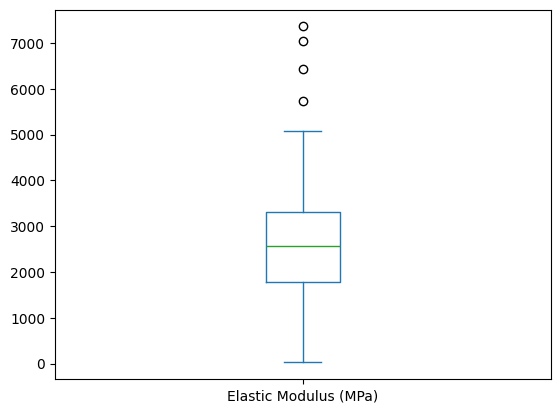

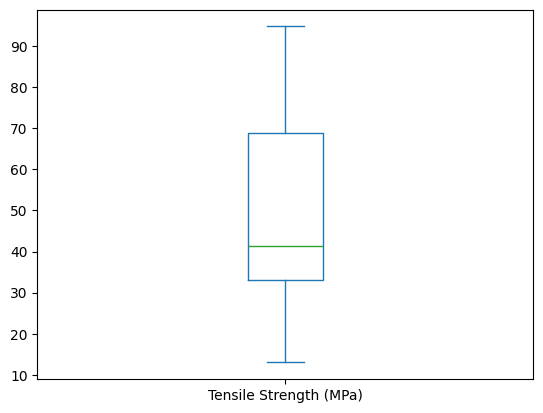

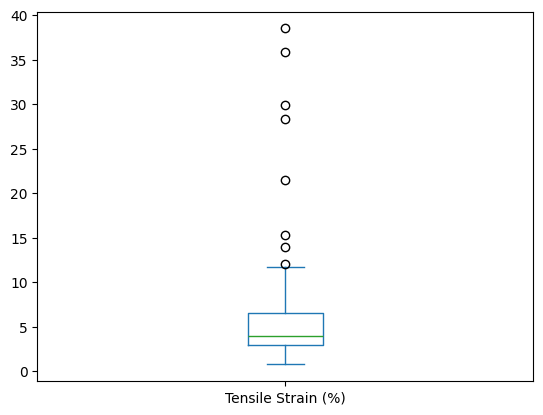

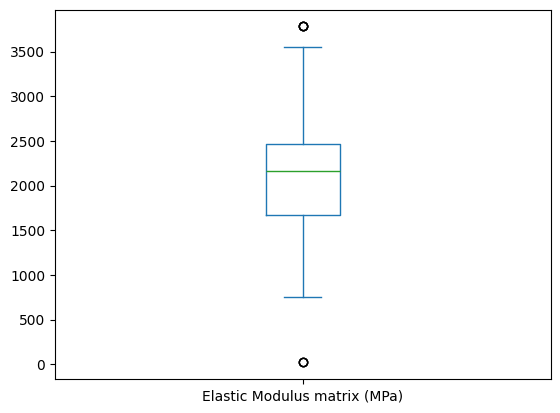

In [14]:
for colonna in nanocomposites:
  if colonna not in ['Polymer Matrix', 'Filler']:
    nanocomposites[[colonna]].plot(kind='box')

In [15]:
X=nanocomposites_encoded[['Filler Concentration (wt%)', 'Elastic Modulus matrix (MPa)','Polymer Matrix_ABS',
       'Polymer Matrix_Epoxy', 'Polymer Matrix_PET', 'Polymer Matrix_PLA',
       'Polymer Matrix_PMMA', 'Filler_Clay', 'Filler_GNP', 'Filler_GNS',
       'Filler_GO', 'Filler_MWCNT', 'Filler_Nanosilica', 'Filler_SWCNT',
       'Filler_Silica', 'Filler_TiO₂', 'Filler_h-BN', 'Filler_rGO']]
y=nanocomposites_encoded[['Elastic Modulus (MPa)', 'Tensile Strength (MPa)', 'Tensile Strain (%)']]
X.head(3)

,Filler Concentration (wt%),Elastic Modulus matrix (MPa),Polymer Matrix_ABS,Polymer Matrix_Epoxy,Polymer Matrix_PET,Polymer Matrix_PLA,Polymer Matrix_PMMA,Filler_Clay,Filler_GNP,Filler_GNS,Filler_GO,Filler_MWCNT,Filler_Nanosilica,Filler_SWCNT,Filler_Silica,Filler_TiO₂,Filler_h-BN,Filler_rGO
0,0.2,3554.7,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1,0.4,3554.7,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,0.2,3554.7,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [16]:
y.head(3)

,Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%)
0,3722.4,74.2,4.4
1,3407.2,71.1,6.2
2,3654.5,72.4,6.9


In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42) #20% delle osservazioni nel testing set

In [56]:
len(y_test)

18

In [57]:
len(y_train)

99

In [77]:
model=RandomForestRegressor(n_estimators=500,max_features='sqrt', random_state=42, oob_score=True)

In [78]:
rf=model.fit(X_train,y_train)

In [79]:
rf.oob_score_ #80%

0.802079746316684

In [80]:
pred_properties=rf.predict(X_test)

In [81]:
mae=mean_absolute_error(y_true=y_test, y_pred=pred_properties)
print('MAE: '+str(mae))

MAE: 91.39680129920283


In [82]:
mse=mean_squared_error(y_true=y_test, y_pred=pred_properties)
rmse=math.sqrt(mse)
print('RMSE: '+str(rmse))

RMSE: 189.66236494135612


In [83]:
r2=rf.score(X_test, y_test)
print('R2:'+str(r2)) #con test_size=0.15 aumenta a 84% tuttavia peggiora per abs+gnp

R2:0.8206985602584987


In [84]:
pred_properties_df=pd.DataFrame(pred_properties, columns=y_test.columns, index=y_test.index)
pred_properties_df
pred_properties_df.head(3)

,Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%)
44,2501.564630,38.569440,19.526895
4,1276.411430,26.566553,4.054640
53,3387.417667,89.559873,6.207021


In [85]:
for colonna in pred_properties_df:
  mae_each_target=mean_absolute_error(y_true=y_test[colonna], y_pred=pred_properties_df[colonna])
  mse_each_target=mean_squared_error(y_true=y_test[colonna], y_pred=pred_properties_df[colonna])
  rmse_each_target=math.sqrt(mse_each_target)
  r2_each_target=r2_score(y_true=y_test[colonna], y_pred=pred_properties_df[colonna])
  print('Colonna: '+colonna)
  print('MAE di '+colonna+' : '+str(mae_each_target))
  print('RMSE di '+colonna+' : '+str(rmse_each_target))
  print('R2 di '+colonna+' : '+str(r2_each_target))

Colonna: Elastic Modulus (MPa)
MAE di Elastic Modulus (MPa) : 267.33644775072287
RMSE di Elastic Modulus (MPa) : 328.39662242970525
R2 di Elastic Modulus (MPa) : 0.8133825781802959
Colonna: Tensile Strength (MPa)
MAE di Tensile Strength (MPa) : 5.624878453523375
RMSE di Tensile Strength (MPa) : 8.226852403778942
R2 di Tensile Strength (MPa) : 0.8289410596705086
Colonna: Tensile Strain (%)
MAE di Tensile Strain (%) : 1.2290776933621907
RMSE di Tensile Strain (%) : 1.8480534982764456
R2 di Tensile Strain (%) : 0.8197720429246917


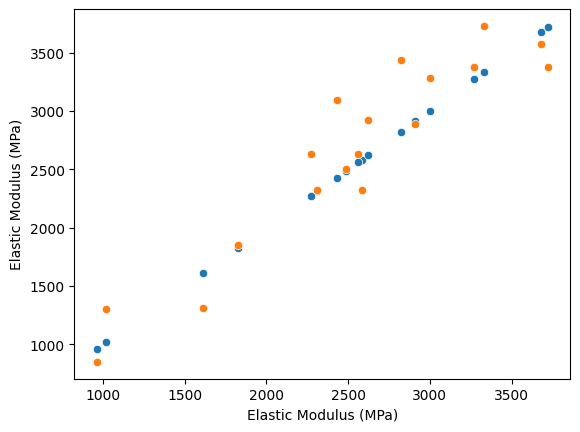

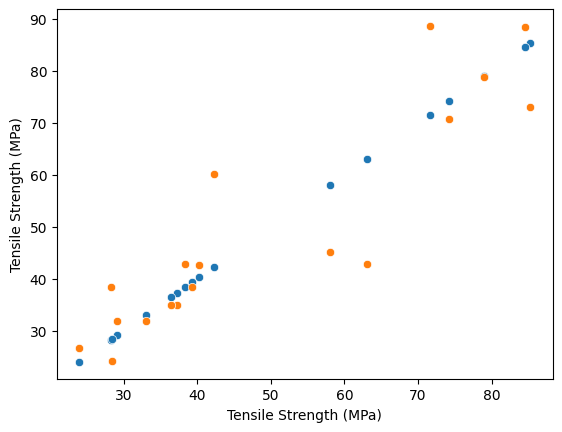

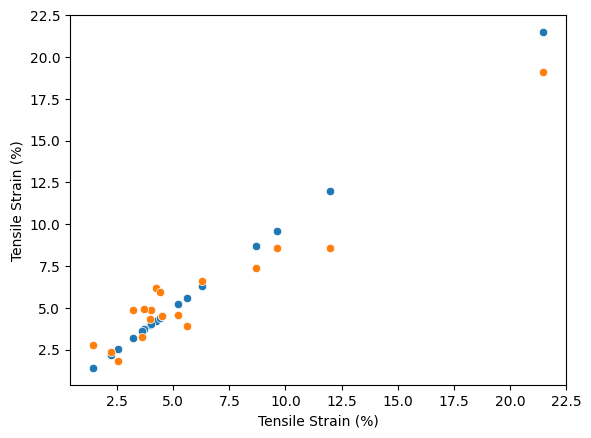

In [69]:
for colonna in pred_properties_df:
  fix,ax=plt.subplots()
  sns.scatterplot(x=y_test[colonna],y=y_test[colonna], ax=ax)
  sns.scatterplot(x=y_test[colonna],y=pred_properties_df[colonna], ax=ax)

valuto solo le performance sui campioni ABS+GNP

In [86]:
mask_abs_gnp=(X_test["Polymer Matrix_ABS"]==1) & (X_test["Filler_GNP"]==1)

In [87]:
X_test_abs_gnp=X_test[mask_abs_gnp]
y_test_abs_gnp=y_test.loc[mask_abs_gnp]

In [88]:
y_pred_abs_gnp=model.predict(X_test_abs_gnp)

In [89]:
mae=mean_absolute_error(y_test_abs_gnp,y_pred_abs_gnp)
rmse=np.sqrt(mean_squared_error(y_test_abs_gnp,y_pred_abs_gnp))
r2=r2_score(y_test_abs_gnp,y_pred_abs_gnp)
print("Valutazione SOLO su ABS+GNP:")
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)

Valutazione SOLO su ABS+GNP:
MAE: 82.78595357683976
RMSE: 180.0846558300954
R2: 0.7877526162077292
